In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\kpava\\Documents\\Machine Learning\\Andrew_Ng assignments\\linear regression\\ex1data1.txt", header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


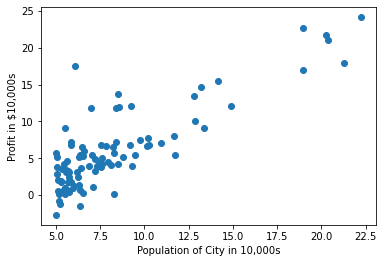

In [3]:
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [4]:
X.shape

(97,)

In [4]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term

<ipython-input-4-67c159ded5b6>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]
<ipython-input-4-67c159ded5b6>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [5]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCost(X, y, theta)
print(J)

32.072733877455676


In [6]:
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [7]:
J = computeCost(X, y, theta)
print(J)

4.483388256587726


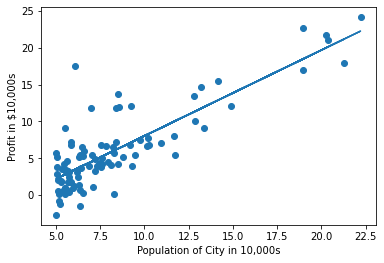

In [8]:
plt.scatter(X[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

In [9]:
def predict_y(x):
    return theta[0] + (theta[1]*x)

In [10]:
predict_y(14)

array([12.69878147])

## Multiple Linear Regression

In [10]:
import numpy as np
import pandas as pd
data = pd.read_csv("C:\\Users\\kpava\\Documents\\Machine Learning\\Andrew_Ng assignments\\linear regression\\ex1data2.txt", sep = ',', header = None)
X = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [11]:
X = (X - np.mean(X))/np.std(X)

In [12]:
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.01
num_iters = 400
theta = np.zeros((3,1))
y = y[:,np.newaxis]

<ipython-input-12-f74fcb530f43>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [13]:
def computeCostMulti(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCostMulti(X, y, theta)
print(J)

65591548106.45744


In [14]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [15]:
J = computeCostMulti(X, y, theta)
print(J)

2105448288.6292474


In [11]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_